<a href="https://colab.research.google.com/github/PaolaMaribel18/RI_2024a/blob/main/week13/introCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 Convolutional Neural Networks
CNNs) are a specialized type of artificial neural network designed for processing grid-like data, such as images. They are particularly well-suited for computer vision tasks due to their ability to automatically learn hierarchical representations from raw pixel values.
CNNs have been highly successful in various applications, such as image classification, object detection, image segmentation, and more.

In [ ]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

1. Dataset Preparation:
* Download and preprocess the Caltech-101 dataset. You can use the tensorflow_datasets library to load the dataset conveniently.
* Normalize the pixel values of the images to the range [0, 1].
* Split the dataset into training and testing sets.

In [ ]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',  # usar version 1.0.3
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

In [ ]:
labels=dataset_info.features['label'].names
print (labels)

['accordion', 'airplanes', 'anchor', 'ant', 'background_google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'faces', 'faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

2. Build the CNN Model:
Define a CNN model with the following architecture:
* Convolutional Layer 1: 32 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 1: Pooling size (2x2).
* Convolutional Layer 2: 64 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 2: Pooling size (2x2).
* Flatten the feature maps.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: Number of units equal to the number of classes in the Caltech-101 dataset.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

##Modelos adicionales

Model v1

In [ ]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


Modelv2

In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



####Model 3

In [ ]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



####Model 4

In [ ]:
model4 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


####Model 5

In [ ]:
model5 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])


####Model 6

In [ ]:
model6 = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax')
])


## Continuacion


3. Training the Model:
* Compile the model with an appropriate optimizer and loss function.
* Train the model using the training dataset and validate it using the testing dataset.
* Observe the training process, including the loss and accuracy metrics.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 15s 165ms/step - loss: 5.0879 - accuracy: 0.0364 - val_loss: 4.4238 - val_accuracy: 0.0539
Epoch 2/10
77/77 [==============================] - 13s 158ms/step - loss: 3.7433 - accuracy: 0.2067 - val_loss: 3.9294 - val_accuracy: 0.1716
Epoch 3/10
77/77 [==============================] - 10s 120ms/step - loss: 1.4981 - accuracy: 0.6810 - val_loss: 4.5103 - val_accuracy: 0.1863
Epoch 4/10
77/77 [==============================] - 9s 112ms/step - loss: 0.2743 - accuracy: 0.9506 - val_loss: 5.9561 - val_accuracy: 0.2157
Epoch 5/10
77/77 [==============================] - 10s 118ms/step - loss: 0.0968 - accuracy: 0.9865 - val_loss: 5.6752 - val_accuracy: 0.1961
Epoch 6/10
77/77 [==============================] - 12s 149ms/step - loss: 0.0225 - accuracy: 0.9963 - val_loss: 6.5408 - val_accuracy: 0.2026
Epoch 7/10
77/77 [==============================] - 9s 106ms/step - loss: 0.0151 - accuracy: 0.9980 - val_loss: 6.7872 - val_accuracy: 0.2206
E

## Modelos Adicionales

######Model 1

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 8s 69ms/step - loss: 4.5816 - accuracy: 0.0327 - val_loss: 4.3731 - val_accuracy: 0.0637
Epoch 2/10
77/77 [==============================] - 5s 57ms/step - loss: 3.9805 - accuracy: 0.1430 - val_loss: 4.0214 - val_accuracy: 0.1471
Epoch 3/10
77/77 [==============================] - 5s 55ms/step - loss: 2.4740 - accuracy: 0.4334 - val_loss: 4.0983 - val_accuracy: 0.2059
Epoch 4/10
77/77 [==============================] - 6s 62ms/step - loss: 0.8829 - accuracy: 0.7884 - val_loss: 5.1898 - val_accuracy: 0.2337
Epoch 5/10
77/77 [==============================] - 5s 57ms/step - loss: 0.2581 - accuracy: 0.9375 - val_loss: 6.8852 - val_accuracy: 0.2353
Epoch 6/10
77/77 [==============================] - 5s 61ms/step - loss: 0.1204 - accuracy: 0.9747 - val_loss: 6.8458 - val_accuracy: 0.2173
Epoch 7/10
77/77 [==============================] - 5s 57ms/step - loss: 0.0666 - accuracy: 0.9861 - val_loss: 7.8444 - val_accuracy: 0.2239
Epoch 8/10
77

#####Model 2

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 9s 76ms/step - loss: 4.6719 - accuracy: 0.0895 - val_loss: 3.8637 - val_accuracy: 0.1634
Epoch 2/10
77/77 [==============================] - 6s 68ms/step - loss: 3.0015 - accuracy: 0.3280 - val_loss: 3.7555 - val_accuracy: 0.2500
Epoch 3/10
77/77 [==============================] - 6s 72ms/step - loss: 1.5515 - accuracy: 0.6217 - val_loss: 4.0645 - val_accuracy: 0.2435
Epoch 4/10
77/77 [==============================] - 6s 64ms/step - loss: 0.7513 - accuracy: 0.8105 - val_loss: 5.0732 - val_accuracy: 0.2794
Epoch 5/10
77/77 [==============================] - 6s 64ms/step - loss: 0.4058 - accuracy: 0.9024 - val_loss: 6.5347 - val_accuracy: 0.2369
Epoch 6/10
77/77 [==============================] - 6s 67ms/step - loss: 0.3863 - accuracy: 0.9052 - val_loss: 6.7571 - val_accuracy: 0.2565
Epoch 7/10
77/77 [==============================] - 5s 61ms/step - loss: 0.2226 - accuracy: 0.9555 - val_loss: 7.7824 - val_accuracy: 0.2467
Epoch 8/10
77

In [ ]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 7s 65ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 8.6097 - val_accuracy: 0.2761
Epoch 2/10
77/77 [==============================] - 5s 60ms/step - loss: 0.0096 - accuracy: 0.9992 - val_loss: 9.0218 - val_accuracy: 0.2810
Epoch 3/10
77/77 [==============================] - 5s 60ms/step - loss: 0.0078 - accuracy: 0.9996 - val_loss: 9.4760 - val_accuracy: 0.2827
Epoch 4/10
77/77 [==============================] - 6s 66ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 9.7430 - val_accuracy: 0.2810
Epoch 5/10
77/77 [==============================] - 6s 62ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 9.9632 - val_accuracy: 0.2810
Epoch 6/10
77/77 [==============================] - 5s 63ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 10.0759 - val_accuracy: 0.2778
Epoch 7/10
77/77 [==============================] - 5s 61ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 10.5352 - val_accuracy: 0.2745
Epoch 8/10


In [ ]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
77/77 [==============================] - 7s 67ms/step - loss: 3.0660e-04 - accuracy: 1.0000 - val_loss: 12.8961 - val_accuracy: 0.2696
Epoch 2/50
77/77 [==============================] - 6s 70ms/step - loss: 2.8829e-04 - accuracy: 1.0000 - val_loss: 12.8664 - val_accuracy: 0.2712
Epoch 3/50
77/77 [==============================] - 5s 63ms/step - loss: 3.0294e-04 - accuracy: 1.0000 - val_loss: 12.9527 - val_accuracy: 0.2712
Epoch 4/50
77/77 [==============================] - 6s 66ms/step - loss: 2.5786e-04 - accuracy: 1.0000 - val_loss: 12.9726 - val_accuracy: 0.2729
Epoch 5/50
77/77 [==============================] - 5s 63ms/step - loss: 2.4926e-04 - accuracy: 1.0000 - val_loss: 13.0495 - val_accuracy: 0.2729
Epoch 6/50
77/77 [==============================] - 5s 60ms/step - loss: 2.5831e-04 - accuracy: 1.0000 - val_loss: 13.0435 - val_accuracy: 0.2729
Epoch 7/50
77/77 [==============================] - 5s 61ms/step - loss: 2.3139e-04 - accuracy: 1.0000 - val_loss: 13.0823 -

In [ ]:
learning_rate = 0.01
batch_size = 256
epochs = 15

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_dataset, epochs=epochs, batch_size=batch_size, validation_data=test_dataset)


Epoch 1/15
77/77 [==============================] - 9s 92ms/step - loss: 6.0330e-04 - accuracy: 1.0000 - val_loss: 12.2701 - val_accuracy: 0.2680
Epoch 2/15
77/77 [==============================] - 5s 61ms/step - loss: 5.6489e-04 - accuracy: 1.0000 - val_loss: 12.3289 - val_accuracy: 0.2663
Epoch 3/15
77/77 [==============================] - 6s 72ms/step - loss: 5.1476e-04 - accuracy: 1.0000 - val_loss: 12.3841 - val_accuracy: 0.2680
Epoch 4/15
77/77 [==============================] - 5s 63ms/step - loss: 4.9943e-04 - accuracy: 1.0000 - val_loss: 12.4413 - val_accuracy: 0.2680
Epoch 5/15
77/77 [==============================] - 6s 67ms/step - loss: 4.6129e-04 - accuracy: 1.0000 - val_loss: 12.4827 - val_accuracy: 0.2663
Epoch 6/15
77/77 [==============================] - 5s 63ms/step - loss: 4.3963e-04 - accuracy: 1.0000 - val_loss: 12.5396 - val_accuracy: 0.2696
Epoch 7/15
77/77 [==============================] - 5s 62ms/step - loss: 4.1695e-04 - accuracy: 1.0000 - val_loss: 12.5734 -

#####Model 3

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 10s 72ms/step - loss: 4.6302 - accuracy: 0.0065 - val_loss: 4.6266 - val_accuracy: 0.0049
Epoch 2/10
77/77 [==============================] - 6s 65ms/step - loss: 4.6254 - accuracy: 0.0082 - val_loss: 4.6281 - val_accuracy: 0.0049
Epoch 3/10
77/77 [==============================] - 8s 90ms/step - loss: 4.6219 - accuracy: 0.0090 - val_loss: 4.6287 - val_accuracy: 0.0049
Epoch 4/10
77/77 [==============================] - 5s 62ms/step - loss: 4.6256 - accuracy: 0.0069 - val_loss: 4.6313 - val_accuracy: 0.0049
Epoch 5/10
77/77 [==============================] - 6s 69ms/step - loss: 4.6246 - accuracy: 0.0106 - val_loss: 4.6325 - val_accuracy: 0.0049
Epoch 6/10
77/77 [==============================] - 6s 64ms/step - loss: 4.6245 - accuracy: 0.0094 - val_loss: 4.6341 - val_accuracy: 0.0065
Epoch 7/10
77/77 [==============================] - 6s 66ms/step - loss: 4.6257 - accuracy: 0.0114 - val_loss: 4.6233 - val_accuracy: 0.0131
Epoch 8/10
7

#####Model 4

In [ ]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 20s 162ms/step - loss: 4.6616 - accuracy: 0.0155 - val_loss: 4.5007 - val_accuracy: 0.0425
Epoch 2/10
77/77 [==============================] - 10s 125ms/step - loss: 4.3314 - accuracy: 0.0715 - val_loss: 4.1877 - val_accuracy: 0.1013
Epoch 3/10
77/77 [==============================] - 11s 132ms/step - loss: 3.3755 - accuracy: 0.2471 - val_loss: 3.8171 - val_accuracy: 0.1977
Epoch 4/10
77/77 [==============================] - 10s 121ms/step - loss: 1.8037 - accuracy: 0.5551 - val_loss: 4.2758 - val_accuracy: 0.2353
Epoch 5/10
77/77 [==============================] - 10s 121ms/step - loss: 0.7005 - accuracy: 0.8231 - val_loss: 6.6297 - val_accuracy: 0.2222
Epoch 6/10
77/77 [==============================] - 10s 123ms/step - loss: 0.2799 - accuracy: 0.9306 - val_loss: 7.2816 - val_accuracy: 0.2353
Epoch 7/10
77/77 [==============================] - 10s 123ms/step - loss: 0.1441 - accuracy: 0.9677 - val_loss: 8.1054 - val_accuracy: 0.2582

In [ ]:
model4.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 11s 124ms/step - loss: 0.0344 - accuracy: 0.9918 - val_loss: 8.4219 - val_accuracy: 0.2696
Epoch 2/10
77/77 [==============================] - 11s 129ms/step - loss: 0.0067 - accuracy: 0.9996 - val_loss: 8.9949 - val_accuracy: 0.2729
Epoch 3/10
77/77 [==============================] - 10s 120ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 9.3600 - val_accuracy: 0.2778
Epoch 4/10
77/77 [==============================] - 10s 124ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 9.6339 - val_accuracy: 0.2794
Epoch 5/10
77/77 [==============================] - 10s 121ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 9.8649 - val_accuracy: 0.2794
Epoch 6/10
77/77 [==============================] - 11s 129ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 10.0684 - val_accuracy: 0.2794
Epoch 7/10
77/77 [==============================] - 10s 119ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 10.2460 - val_accuracy: 0.27

####Model 5

In [ ]:
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 17s 140ms/step - loss: 4.8192 - accuracy: 0.0217 - val_loss: 4.4908 - val_accuracy: 0.0392
Epoch 2/10
77/77 [==============================] - 10s 128ms/step - loss: 4.3744 - accuracy: 0.0707 - val_loss: 4.3620 - val_accuracy: 0.0801
Epoch 3/10
77/77 [==============================] - 10s 117ms/step - loss: 3.4605 - accuracy: 0.2459 - val_loss: 4.3092 - val_accuracy: 0.1389
Epoch 4/10
77/77 [==============================] - 10s 120ms/step - loss: 1.6525 - accuracy: 0.6254 - val_loss: 5.3926 - val_accuracy: 0.1569
Epoch 5/10
77/77 [==============================] - 10s 117ms/step - loss: 0.6300 - accuracy: 0.8668 - val_loss: 6.7456 - val_accuracy: 0.1438
Epoch 6/10
77/77 [==============================] - 10s 117ms/step - loss: 0.2938 - accuracy: 0.9395 - val_loss: 7.0925 - val_accuracy: 0.1487
Epoch 7/10
77/77 [==============================] - 10s 121ms/step - loss: 0.2642 - accuracy: 0.9498 - val_loss: 7.6241 - val_accuracy: 0.1569

####Model 6

In [ ]:
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 15s 126ms/step - loss: 5.0364 - accuracy: 0.0351 - val_loss: 4.4145 - val_accuracy: 0.0899
Epoch 2/10
77/77 [==============================] - 9s 110ms/step - loss: 3.3660 - accuracy: 0.2733 - val_loss: 4.2263 - val_accuracy: 0.2288
Epoch 3/10
77/77 [==============================] - 9s 114ms/step - loss: 0.9524 - accuracy: 0.8056 - val_loss: 7.8159 - val_accuracy: 0.2141
Epoch 4/10
77/77 [==============================] - 9s 114ms/step - loss: 0.1819 - accuracy: 0.9641 - val_loss: 9.3289 - val_accuracy: 0.2010
Epoch 5/10
77/77 [==============================] - 9s 107ms/step - loss: 0.0419 - accuracy: 0.9931 - val_loss: 12.9980 - val_accuracy: 0.2222
Epoch 6/10
77/77 [==============================] - 9s 111ms/step - loss: 0.0270 - accuracy: 0.9959 - val_loss: 13.4754 - val_accuracy: 0.2418
Epoch 7/10
77/77 [==============================] - 9s 107ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 13.1300 - val_accuracy: 0.2320
Ep

## Continuacion


4. Understanding Parameter Sharing and Local Receptive Fields:
* Analyze the number of learnable parameters in each layer of the CNN model.

¿What is parameter sharing? ¿What's its role in reducing the model's complexity?

In [ ]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 23920550


5. Evaluation and Interpretation:
* Evaluate the model's performance on the testing dataset and calculate the accuracy.
* Visualize some misclassified images and discuss the possible reasons for misclassifications.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 3s 142ms/step - loss: 7.0764 - accuracy: 0.2320
Accuracy on the test set: 23.20%


## Modelos adicionales


In [ ]:
loss, accuracy = model1.evaluate(test_dataset)
print(f"Accuracy model 1 on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 0s 22ms/step - loss: 8.7420 - accuracy: 0.2516
Accuracy model 1 on the test set: 25.16%


In [ ]:
loss, accuracy = model2.evaluate(test_dataset)
print(f"Accuracy model 2 on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 0s 22ms/step - loss: 13.8609 - accuracy: 0.2761
Accuracy model 2 on the test set: 27.61%


In [ ]:
loss, accuracy = model3.evaluate(test_dataset)
print(f"Accuracy model 3 on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 1s 23ms/step - loss: 4.5653 - accuracy: 0.0065
Accuracy model 3 on the test set: 0.65%


In [ ]:
loss, accuracy = model4.evaluate(test_dataset)
print(f"Accuracy model 4 on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 1s 32ms/step - loss: 10.6402 - accuracy: 0.2794
Accuracy model 4 on the test set: 27.94%


In [ ]:
loss, accuracy = model5.evaluate(test_dataset)
print(f"Accuracy model 5 on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 1s 34ms/step - loss: 8.9436 - accuracy: 0.1585
Accuracy model 5 on the test set: 15.85%


In [ ]:
loss, accuracy = model6.evaluate(test_dataset)
print(f"Accuracy model 6 on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 1s 25ms/step - loss: 13.0020 - accuracy: 0.2124
Accuracy model 6 on the test set: 21.24%


Entre estos modelos, el Modelo 4 logró la mayor precisión en el conjunto de prueba, alcanzando un 27.94%. Sin embargo, todos los modelos enfrentaron desafíos para obtener una precisión alta en este conjunto de datos, lo que sugiere que podría requerirse un ajuste más exhaustivo de hiperparámetros, así como posibles mejoras en la arquitectura y el preprocesamiento de los datos para lograr un mejor rendimiento.

## Continuacion


1/1 [==============================] - 1s 833ms/step


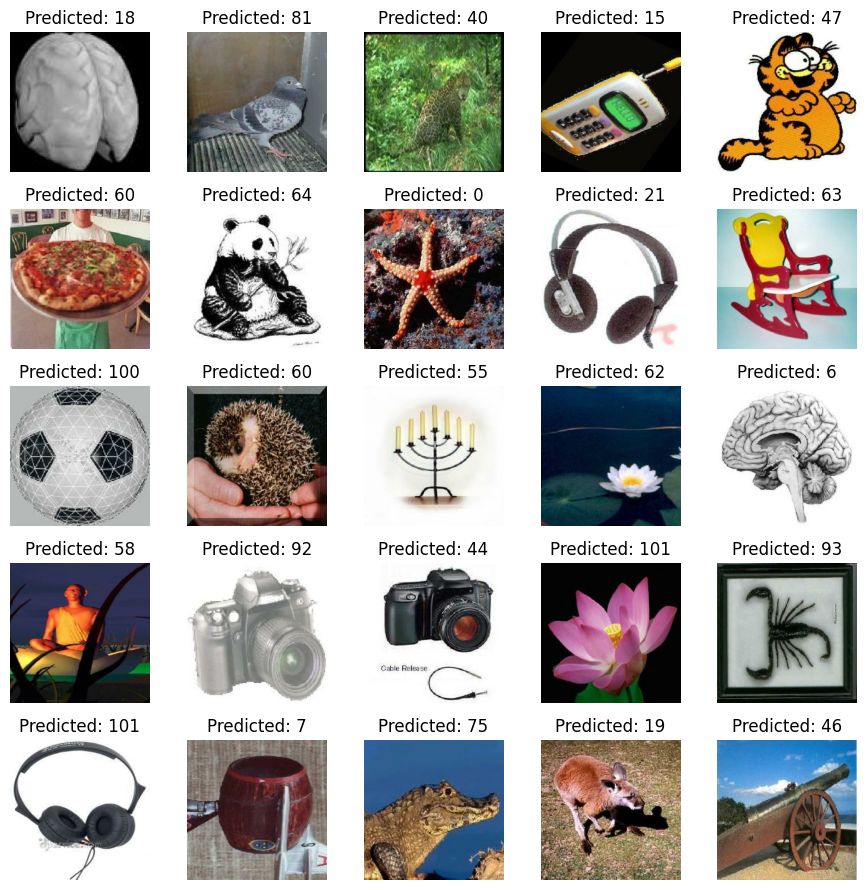

In [ ]:
misclassified_images = []
misclassified_labels = []

for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

max_display = 25
misclassified_images = misclassified_images[:max_display]
misclassified_labels = misclassified_labels[:max_display]

plt.figure(figsize=(9, 9))
for i in range(len(misclassified_images)):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


6. Pick a sample image and show the feature maps activated by the convolutional layers

1/1 [==============================] - 0s 84ms/step


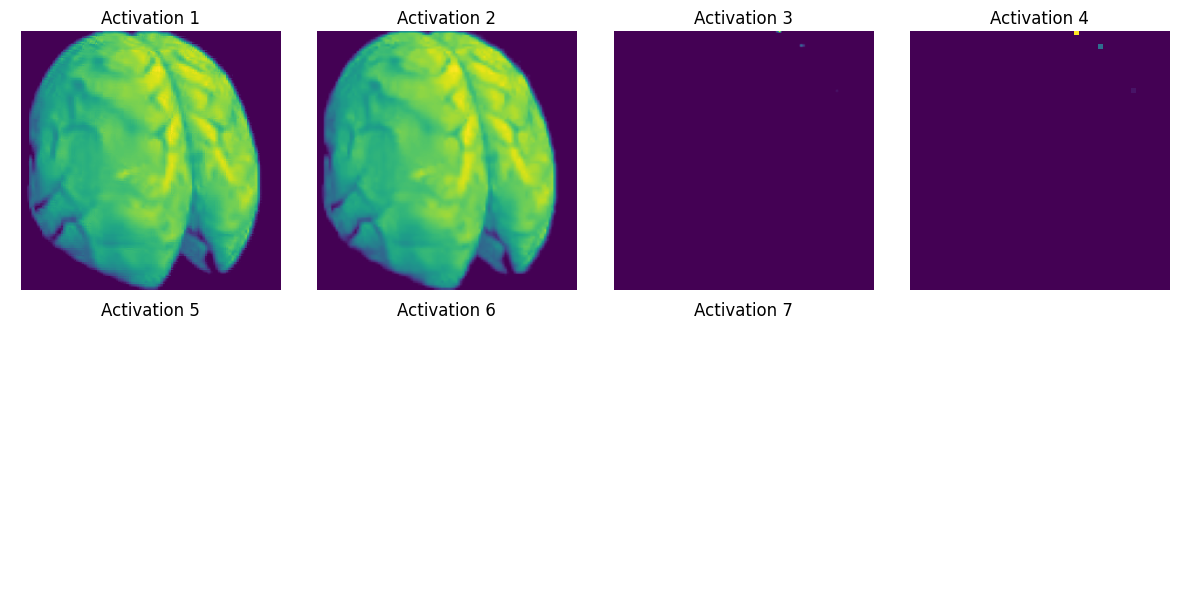

In [ ]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(sample_image)

plt.figure(figsize=(12, 6))
for i, activation in enumerate(activations[:8]):
    plt.subplot(2, 4, i+1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()
